In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
import warnings

# Load dataset from CSV file
df = pd.read_csv('/content/weather_forecast.csv')

# Converting categorical variables into numeric using label encoding
le_outlook = preprocessing.LabelEncoder()
le_temperature = preprocessing.LabelEncoder()
le_humidity = preprocessing.LabelEncoder()
le_windy = preprocessing.LabelEncoder()
le_play = preprocessing.LabelEncoder()

df['Outlook'] = le_outlook.fit_transform(df['Outlook'])
df['Temperature'] = le_temperature.fit_transform(df['Temperature'])
df['Humidity'] = le_humidity.fit_transform(df['Humidity'])
df['Windy'] = le_windy.fit_transform(df['Windy'])
df['Play'] = le_play.fit_transform(df['Play'])

# Splitting features and labels
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]  # Features
y = df['Play']  # Target variable (Play or not)

# Creating the Decision Tree classifier with criterion='entropy' to use ID3
clf = DecisionTreeClassifier(criterion="entropy")

# Training the classifier
clf = clf.fit(X, y)

# Predicting for a new sample
# For example, new sample: Outlook=Sunny, Temperature=Hot, Humidity=High, Windy=Weak
new_sample = [[le_outlook.transform(['Rain'])[0],
               le_temperature.transform(['Hot'])[0],
               le_humidity.transform(['High'])[0],
               le_windy.transform(['Weak'])[0]]]

# Predicting the outcome for the new sample
prediction = clf.predict(new_sample)
print("New Sample Prediction:", 'Yes' if prediction[0] == 1 else 'No')

# Testing model accuracy on the dataset
y_pred = clf.predict(X)
print("Model Accuracy:", metrics.accuracy_score(y, y_pred))


New Sample Prediction: Yes
Model Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


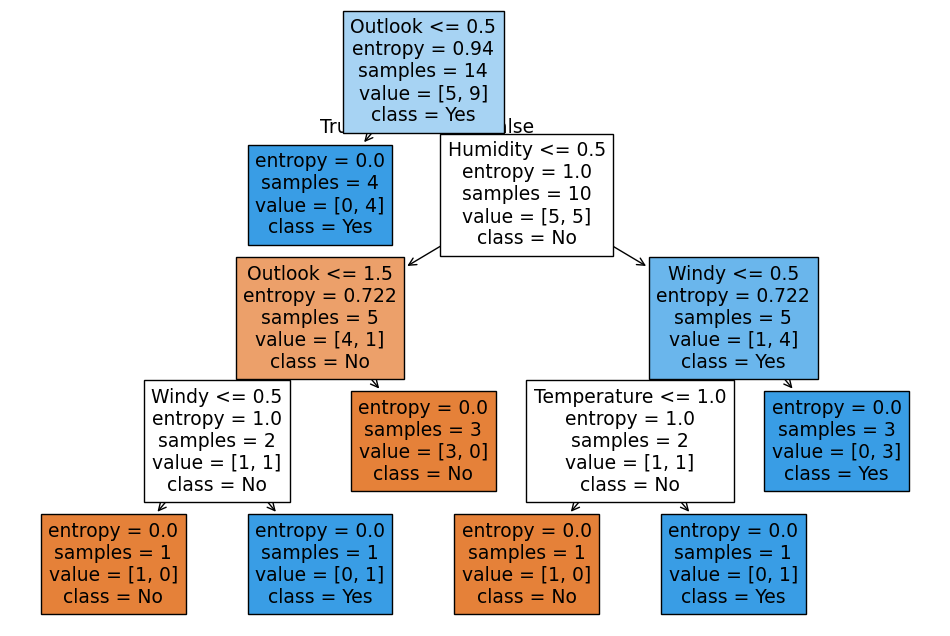

In [3]:
#Visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], class_names=['No', 'Yes'], filled=True)
plt.show()
